# Analysis of SAXS experiments for the mixture HSA and PAA

**Estimation of the average Porod volume for the mixture HSA, PAA and complexe**

One consider a mixture of HSA and PAA with the molar concentration $[HSA]_0$ and $[PAA]_0$ respectively and the formation of a complex with the following stochiometry :

$$n HSA + 1 PAA \to 1 complex(PAA-nHSA) $$

For a progress of the complexation corresponding to a molar concentration in complex $[c]$ :
$$[PAA]=[PAA]_0-[c]$$
$$[HSA]=[HSA]_0-(n*[c])$$

If the PAA is on excess ($[HSA]_0<n[PAA]_0$), the composition in the mixture is :
$$[c]=[HSA]_0/n$$
$$[PAA]=[PAA]_0-[HSA]_0/n$$

If HSA is on excess ($[HSA]_0>n[PAA]_0$), the composition in the mixture is :
$$[c]=[PAA]_0$$
$$[HSA]=[HSA]_0-(n*[PAA]_0)$$

One can define the volume fraction of the mixture as : 
$$\phi=N_{Avo}([c]V_c+[HSA]V_{HSA}+[PAA]V_{PAA})$$
where $V_c$, $V_{HSA}$, $V_{PAA}$ are the volume of a molecule of complex, HSA and PAA respectively

The relative volume fraction of the complex in the mixture is then :
$$\varphi_c=\frac{N_{Avo}[c]V_c}{\phi}$$

From SAXS experiments (for isotropic interactions -spherical particles), it is possible to obtain the Porod volume of an object from the Porod invariant, $\textbf{Q}$
$$V_{obj}=\frac{2\pi^2 I(O)}{\textbf{Q}}*\frac{1-\phi}{S(0)}$$
When the dispersion is diluted $\phi\rightarrow 0$ and $S(0)\rightarrow 0$

$\textbf{Q}$ is called the Porod invariant because its value does not depend on the structure but on the volume fraction $\textbf{Q}=\int_0^\inf q^2 (I(q)-K) dq=2\pi^2\phi(1-\phi)(\Delta\rho)^2$
whereby the constant K is calculated from the Porod asymptote $I(q)q^4$ versus $q^4$ at higher angles

When the dispersion is made of p kinds of particles of volume, $V_i$ and number $N_i$ The SAXS signal I(q) for a mixture is averaged by the volume fraction according : 
$$I(q)=\Sigma(\varphi_i*I_i(q))$$
where $\Sigma \varphi_i=1$

Combining the two last equations allows to link the Porod volume of the mixture to the volume fraction and the properties of the complexe and the HSA (the contribution of the PAA is neglegible) : 
$$\textbf{Q}_{M} V_{M}=\varphi_c \textbf{Q}_{c} V_c + \varphi_{HSA} \textbf{Q}_{HSA} V_{HSA}$$

$$V_{M}=\frac{\textbf{Q}_{c}}{\textbf{Q}_M}\varphi_c V_c + \frac{\textbf{Q}_{HSA}}{\textbf{Q}_M}\varphi_{HSA} V_{HSA}$$

$$\frac{\textbf{Q}_{c}}{\textbf{Q}_M}=\frac{\phi_c(1-\phi_c)}{\phi(1-\phi)} \approx \varphi_c $$

$$V_{M}=\frac{1}{\phi^2(1-\phi)} (\phi_c^2(1-\phi_c) V_c + \phi_{HSA}^2(1-\phi_{HSA}) V_{HSA}+ \phi_{PAA}^2(1-\phi_{PAA}) V_{PAA})$$

$$V_{M}\approx\varphi_c^2  V_c + \varphi_{HSA}^2 V_{HSA}+ \varphi_{PAA}^2 V_{PAA}$$


When the dispersion is made of n kinds of particles of volume $V_i$ and number $N_i$, for a dilute dispersion, S(0)=1, the average volume can be written (spalla eq. 54) :

$$V_M=\frac{\sum_{i}^{n} N_i V_i^2}{\sum_{i}^{n} N_i V_i}$$

$$V_M=\frac{\sum_{i}^{n} \phi_i V_i}{\sum_{i}^{n} \phi_i}=\sum_{i}^{n} \varphi_i V_i$$
But It works better with ?!

$$V_{M}=\varphi_c  V_c + \varphi_{HSA} V_{HSA}+ \varphi_{PAA} V_{PAA}$$




In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import trapz
from scipy.optimize import curve_fit
from scipy import stats

MM_HSA=67000 #g/mol
MM_PAA=100000 #g/mol
Navo=6.02214076e+23 #mol−1
HSA0_tab=np.array([5.,10.,12.,15.,18.,20.,25.,30.,40.]) #g/L
HSA0_tab=HSA0_tab*1e6/MM_HSA ##micromol/L
PAA0=50 #micromol/L
#Valeur expérimentale du volume de Porod en fonction de HSA0_tab
Vp_tab=np.array([527,505,535,443,386,392,310,242,183])

#volume of the objects
V_COMP=510 #nm3 550
V_HSA=100 #nm3
V_PAA=50 #nm3 70

#calcul de la fraction volumique totale (pas necessaire)
HSA0=40.*1e6/MM_HSA #micromol/L
N=Navo*1e-6*((1.e-8)**3) 
nHSA=HSA0*N #HSA/nm3
dist=(3/(4*np.pi*nHSA))**(1./3)
print (nHSA*1e6, 'molecules of HSA in (100nm)3')
print ('inter-HSA distance :', dist, 'nm')

#fraction molaire de complexe
n=4.
MM_c=MM_HSA*n+MM_PAA

#fonction pour calculer le volume de Porod pour un mélange de PAA et HSA à partir des volumes des objets
def Vp(tab,n):
    #where tab contains the value of HSA
    Vp_tab=np.zeros(len(tab))
    phi=np.zeros(len(tab))
    phi_c_tab=np.zeros(len(tab))
    phi_hsa_tab=np.zeros(len(tab))
    phi_paa_tab=np.zeros(len(tab))
    Qc_Qm=np.zeros(len(tab))
    Qhsa_Qm=np.zeros(len(tab))
    Qpaa_Qm=np.zeros(len(tab))
    phi_Q=np.zeros(len(tab))
    k=0
    for HSA0 in tab :
        #calcul de la concentration molaire en complexe
        if HSA0<(PAA0*n):
            #PAA en excès
            c=HSA0/n 
            paa=PAA0-c
            hsa=0.
        else:
            #HSA en excès
            c=PAA0
            paa=0.
            hsa=HSA0-n*c
        #Fraction molaire
        #x[i]=c/(c+(HSA0-n*c))
        #Fraction massique
        #x[i]=c*MM_c/(c*MM_c+(HSA0-n*c)*MM_HSA)
        #Calcul des fractions volumiques totale et partielle 
        phi_tot=N*(c*V_COMP+hsa*V_HSA+paa*V_PAA)
        phi_c=N*(c*V_COMP/phi_tot)
        phi_hsa=N*hsa*V_HSA/phi_tot
        phi_paa=N*paa*V_PAA/phi_tot
        QcQm=phi_c*phi_tot*(1-phi_c*phi_tot)/(phi_tot*(1-phi_tot))
        QhsaQm=phi_hsa*phi_tot*(1-phi_hsa*phi_tot)/(phi_tot*(1-phi_tot))
        QpaaQm=phi_paa*phi_tot*(1-phi_paa*phi_tot)/(phi_tot*(1-phi_tot))
        phiQ=phi_tot*(1-phi_tot)
        #Calcul du volume de Porod
        Vp=phi_c*V_COMP+phi_hsa*V_HSA+phi_paa*V_PAA
        #Vp=phi_c*V_COMP*QcQm+phi_hsa*V_HSA*QhsaQm+phi_paa*V_PAA*QpaaQm
        Vp_tab[k]=Vp
        phi[k]=phi_tot
        phi_c_tab[k]=phi_c
        phi_hsa_tab[k]=phi_hsa
        phi_paa_tab[k]=phi_paa
        Qc_Qm[k]=QcQm
        Qhsa_Qm[k]=QhsaQm
        Qpaa_Qm[k]=QpaaQm
        phi_Q[k]=phiQ
        k=k+1
    return Vp_tab, phi_c_tab, phi_hsa_tab, phi_paa_tab, phi,Qc_Qm,Qhsa_Qm,Qpaa_Qm,phi_Q

plt.plot(HSA0_tab/PAA0,Vp_tab,'x', label='SAXS')
HSA_calc=np.linspace(0,70,100)*1e6/MM_HSA
plt.plot(HSA_calc/PAA0,Vp(HSA_calc,n)[0],'--', label='Calculation')
plt.plot([n,n],[0,max(Vp(HSA_calc,n)[0])],'r--')
plt.xlabel('[HSA]/[PAA]')
plt.ylabel('Porod volume (nm3)')  
plt.legend(loc='best')
plt.show()       

plt.plot(HSA_calc/PAA0,Vp(HSA_calc,n)[1],'--', label='phi_c')
plt.plot(HSA_calc/PAA0,Vp(HSA_calc,n)[2],'--', label='phi_hsa')
plt.plot(HSA_calc/PAA0,Vp(HSA_calc,n)[3],'--', label='phi_paa')
plt.plot([n,n],[0,max(Vp(HSA_calc,n)[1])],'r--')
plt.xlabel('[HSA]/[PAA]')
plt.ylabel('phi_relative')  
plt.legend(loc='best')
plt.show() 

plt.plot(HSA_calc/PAA0,Vp(HSA_calc,n)[4],'--', label='phi')
plt.xlabel('[HSA]/[PAA]')
plt.ylabel('phi')  
plt.legend(loc='best')
plt.show()

plt.plot(HSA_calc/PAA0,Vp(HSA_calc,n)[5],'--', label='Qc/Qm')
plt.plot(HSA_calc/PAA0,Vp(HSA_calc,n)[6],'--', label='Qhsa/Qm')
plt.plot(HSA_calc/PAA0,Vp(HSA_calc,n)[7],'--', label='Qpaa/Qm')
plt.xlabel('[HSA]/[PAA]')
plt.ylabel('Qi/Qm')  
plt.legend(loc='best')
plt.show()




359.5307916417911 molecules of HSA in (100nm)3
inter-HSA distance : 8.724189690475523 nm


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

HSA= 5 g/L


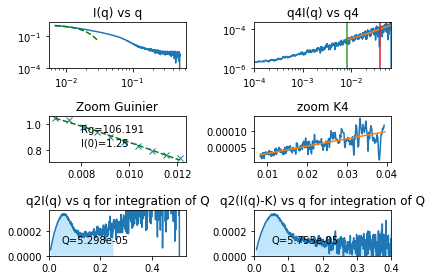

Porod volume : 465.625 nm3
HSA= 10 g/L


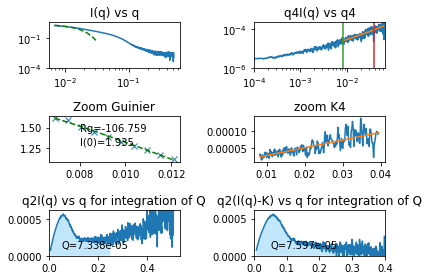

Porod volume : 520.383 nm3
HSA= 12 g/L


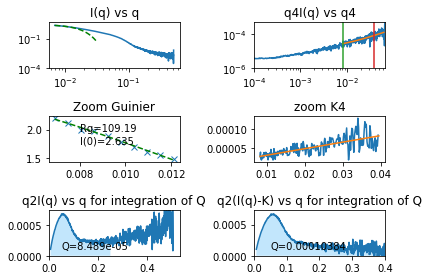

Porod volume : 612.65 nm3
HSA= 15 g/L


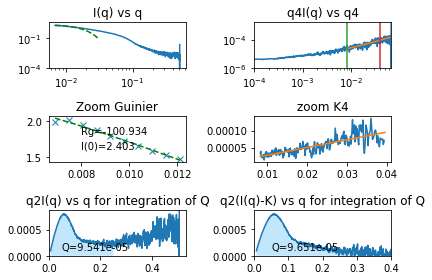

Porod volume : 497.105 nm3
HSA= 18 g/L


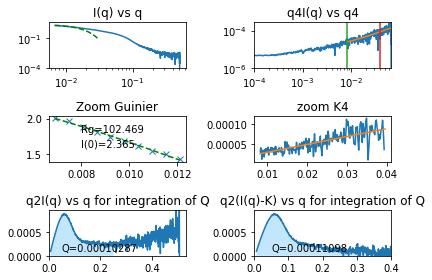

Porod volume : 453.892 nm3
HSA= 20 g/L


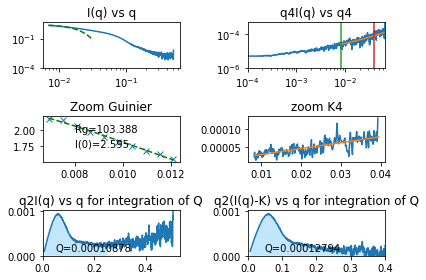

Porod volume : 470.912 nm3
HSA= 25 g/L


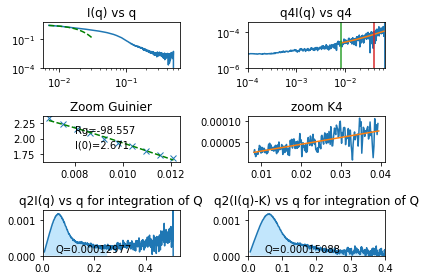

Porod volume : 406.298 nm3
HSA= 30 g/L


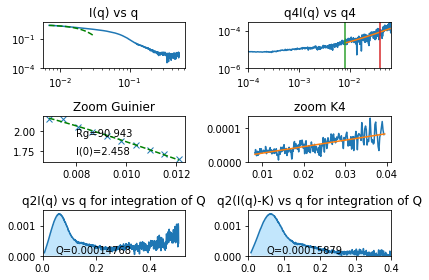

Porod volume : 328.536 nm3
HSA= 40 g/L


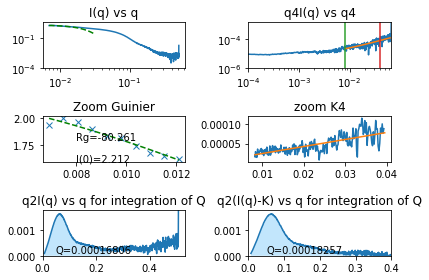

Porod volume : 259.821 nm3


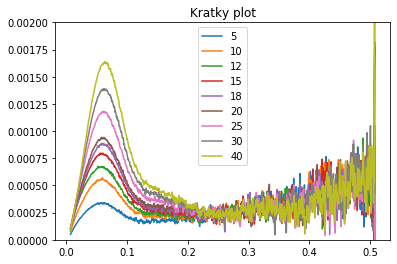

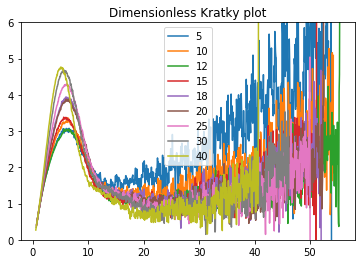

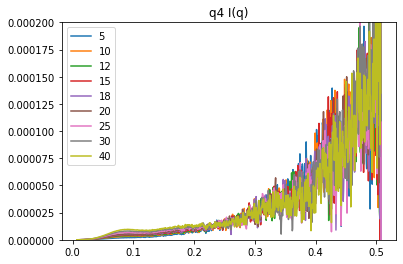

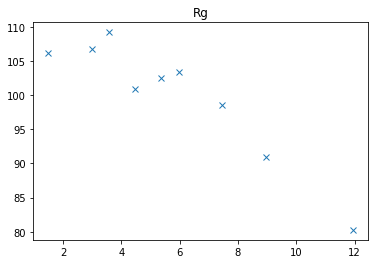

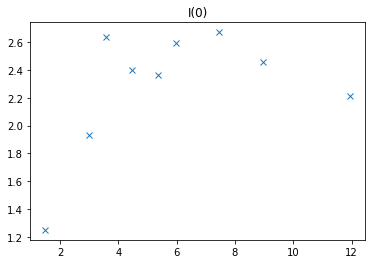

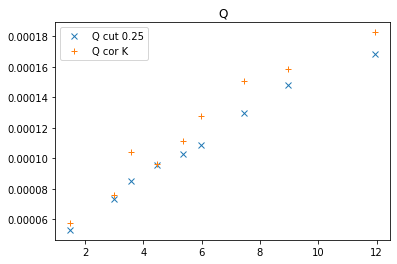

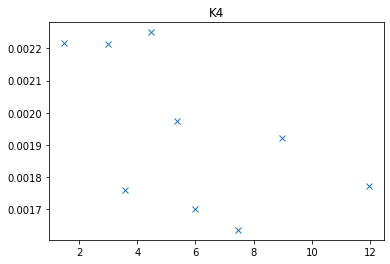

Dro (in A-2)= 1.3865764122856377e-06


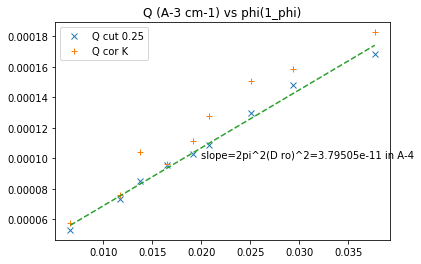

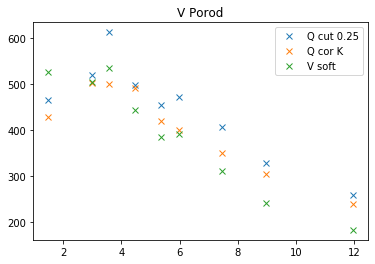

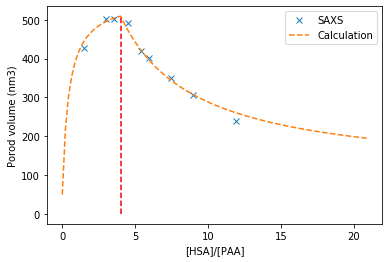

In [6]:



def guinier(q,rg,I0):
    I=I0*np.exp(-(q**2)*(rg**2)/3)
    return I

filename ='C:/Users/patri/Documents/Recherche/theses/these_charaf/SAXS_dat/HSA_Mrg.dat'
datas = np.genfromtxt(filename, delimiter='  ')

hsa_saxs=['5','10','12','15','18','20','25','30','40'] 

Vpo=np.zeros(len(hsa_saxs))
Vpo_K4=np.zeros(len(hsa_saxs))
I0=np.zeros(len(hsa_saxs))
Q=np.zeros(len(hsa_saxs))
K4=np.zeros(len(hsa_saxs))
Q_K4=np.zeros(len(hsa_saxs))
Rg=np.zeros(len(hsa_saxs))
q2IQ_save=np.zeros((len(hsa_saxs),875))
q4IQ_save=np.zeros((len(hsa_saxs),875))

j=0
for a in hsa_saxs:
    #data read
    filename ='C:/Users/patri/Documents/Recherche/theses/these_charaf/SAXS_dat/HSA_'+a+'gL+PAA50uM.dat'
    data = np.genfromtxt(filename, delimiter=' ')
    print ('HSA=',a,'g/L')
    
    #plot I(q)
    ax1 = plt.subplot(321)
    plt.loglog (data [:,0], data [:,1])
    plt.title('I(q) vs q')
    
    #Calc. and plot Guinier
    qmax=10
    popt, pcov = curve_fit(guinier, data [:qmax,0], data [:qmax,1])
    plt.loglog (data [:42,0], guinier(data [:42,0], *popt), 'g--')
    plt.ylim(1e-4, max(data [:,1])*2) 
    #Plot zoom in Guinier 
    ax3 = plt.subplot(323)
    plt.plot (data [:qmax,0], data [:qmax,1],'x')
    plt.plot (data [:qmax,0], guinier(data [:qmax,0], *popt), 'g--')
    ymax=max(data [:qmax,1])
    #Save and print Rg and I0 values
    Rg[j]=popt[0]
    I0[j]=popt[1]  
    ax3.annotate('Rg={}'.format(round(popt[0],3)), xy=(0.008, 0.9*ymax))
    ax3.annotate('I(0)={}'.format(round(popt[1],3)), xy=(0.008, 0.8*ymax))
    plt.title('Zoom Guinier')  
    
    #Calculation of other moments of I(q)
    q2Iq=np.zeros(len(data [:,0]))
    q2Iq_K4=np.zeros(len(data [:,0]))
    q4Iq_K4=np.zeros(len(data [:,0]))
    q4Iq=np.zeros(len(data[:,0]))
    q4=np.zeros(len(data [:,0]))
    for i in range (len(data [:,0])):
        q2Iq[i]=(data [i,0]**2)*data [i,1]       
        q4Iq[i]=(data [i,0]**4)*data [i,1]
        q4[i]=data [i,0]**4
    #save q2Iq
    q2IQ_save[j,:]=q2Iq[:]
    q4IQ_save[j,:]=q4Iq[:]
    
    #plot q4I(q) v q4
    ax2 = plt.subplot(322)
    plt.loglog(q4[:], q4Iq[:])
    plt.title('q4I(q) vs q4')  
    
    #calc of K4 (asymptote for high q) 
    #limit for the linear regression
    asym=511 #asymptote à partir de q4=1e-2 soit q=0.3 ligne *511* q=0.35 (598)
    asymx=765 #asymptote jsuqu'à 0.4 686 0.44 757 0.445 *765* 0.45 *774* 0.46 792 (avec 0.4 res proche du soft)
    slope, intercept, r_value, p_value, std_err = stats.linregress(q4[asym:asymx],q4Iq[asym:asymx]) 
    #plot asymptote and limit
    K4[j]=slope
    plt.loglog (q4[asym:863],intercept+slope*q4[asym:863])
    plt.loglog ([q4[asym],q4[asym]],[1e-6, max(q4Iq[:])])
    plt.loglog ([q4[asymx],q4[asymx]],[1e-6, max(q4Iq[:])])
    plt.xlim(1e-4, max(q4[:]))
    plt.ylim(1e-6, max(q4Iq[:]))
    
    #calc of q2((Iq)-K4)
    for i in range (len(data [:,0])):     
        q2Iq_K4[i]=(data [i,0]**2)*(data [i,1]-slope)
        q4Iq_K4[i]=(data [i,0]**4)*(data [i,1]-slope)
    
    #plot q4(I(q)-K) v q
    ax4 = plt.subplot(324)
    plt.plot(q4[asym:asymx],q4Iq[asym:asymx])
    plt.plot ([q4[asym],q4[asymx]],[intercept+slope*q4[asym],intercept+slope*q4[asymx]])
    plt.title('zoom K4')
    
    #plot q2I(q) v q
    ax5 = plt.subplot(325)
    plt.plot(data [:,0], q2Iq[:])
    plt.ylim(0,max(q2Iq[0:425])*1.1)
    plt.xlim(0,)
    int_max=425 #correspond to q=0.25
    plt.fill_between(data [:int_max,0], q2Iq[:int_max], facecolor='lightskyblue', alpha=0.5)
    plt.title('q2I(q) vs q for integration of Q')
    
    
    
    #Calc of Q by integration with a cut at 0.25
    Q[j]=trapz(q2Iq[:int_max], data [:int_max,0]) 
    ax5.annotate('Q={}'.format(round(Q[j],8)), xy=(0.05, 1e-4))
    
    #Calc of Q by integration of q2(I(Q)-K4)
    Q_K4[j]=trapz(q2Iq_K4[:], data [:,0])
    
    #plot q2(I(q)-K) v q
    ax6 = plt.subplot(326)
    plt.plot(data [:,0], q2Iq_K4[:])
    plt.ylim(0,max(q2Iq_K4[0:425])*1.1)
    plt.xlim(0,0.4)
    plt.fill_between(data [:,0], q2Iq_K4[:], facecolor='lightskyblue', alpha=0.5)
    plt.title('q2(I(q)-K) vs q for integration of Q')
    ax6.annotate('Q={}'.format(round(Q_K4[j],8)), xy=(0.05, 1e-4))
    
    #Calc of Porod volume
    Vpo[j]=2*(np.pi**2)*I0[j]/Q[j]
    Vpo_K4[j]=2*(np.pi**2)*I0[j]/Q_K4[j]
    
    #Config and plot subplot
    plt.tight_layout()
    plt.show()
    print ('Porod volume :', round(Vpo[j]/1000,3), 'nm3')
    j=j+1


for i in range(len(HSA0_tab)):
    plt.plot(data [:,0], q2IQ_save[i,:],label=hsa_saxs[i])
plt.legend(loc='best')
plt.title('Kratky plot')
plt.ylim(0,0.002)
plt.show()

for i in range(len(HSA0_tab)):
    plt.plot(data [:,0]*abs(Rg[i]), q2IQ_save[i,:]*(Rg[i]**2)/I0[i],label=hsa_saxs[i])
plt.legend(loc='best')
#Kikhney, A. G., & Svergun, D. I. (2015). A practical guide to small angle X‐ray scattering (SAXS) of flexible and intrinsically disordered proteins. FEBS letters, 589(19PartA), 2570-2577.
plt.title('Dimensionless Kratky plot')
plt.ylim(0,6)
plt.show()



for i in range(len(HSA0_tab)):
    plt.plot(data [:,0], q4IQ_save[i,:],label=hsa_saxs[i])
plt.legend(loc='best')
plt.title('q4 I(q)')
plt.ylim(0,0.0002)
plt.show()

    
plt.plot(HSA0_tab/PAA0, abs(Rg),'x')
plt.title('Rg') 
plt.show()
plt.plot(HSA0_tab/PAA0, I0,'x')
plt.title('I(0)') 
plt.show()

plt.plot(HSA0_tab/PAA0, Q,'x', label='Q cut 0.25')
plt.plot(HSA0_tab/PAA0, Q_K4,'+', label='Q cor K')
plt.legend(loc='best')
plt.title('Q') 
plt.show()

plt.plot(HSA0_tab/PAA0, K4,'x')
plt.title('K4') 
plt.show()

plt.plot(Vp(HSA0_tab,n)[8], Q,'x', label='Q cut 0.25')
plt.plot(Vp(HSA0_tab,n)[8], Q_K4,'+', label='Q cor K')
slope, intercept, r_value, p_value, std_err = stats.linregress(Vp(HSA0_tab,n)[8],Q) 
plt.plot (Vp(HSA0_tab,n)[8],intercept+slope*Vp(HSA0_tab,n)[8],'--')
plt.annotate('slope=2pi^2(D ro)^2={} in A-4'.format(round(slope,8)*1e-8), xy=(0.02, 1e-4))
print ('Dro (in A-2)=', np.sqrt(slope*1e-8/(2*np.pi**2)))
plt.legend(loc='best')
plt.title('Q (A-3 cm-1) vs phi(1_phi)') 
plt.show()


plt.plot(HSA0_tab/PAA0, Vpo/1000,'x', label='Q cut 0.25')
plt.plot(HSA0_tab/PAA0, Vpo_K4/1000,'x', label='Q cor K')
plt.plot(HSA0_tab/PAA0, Vp_tab,'x', label='V soft')
plt.title('V Porod') 
plt.legend(loc='best')
plt.show()

plt.plot(HSA0_tab/PAA0,Vpo_K4/1000,'x', label='SAXS')
plt.plot(HSA_calc/PAA0,Vp(HSA_calc,n)[0],'--', label='Calculation')
plt.plot([n,n],[0,max(Vp(HSA_calc,n)[0])],'r--')
plt.xlabel('[HSA]/[PAA]')
plt.ylabel('Porod volume (nm3)')  
plt.legend(loc='best')
plt.show() 


In [4]:
print (hsa_saxs[5])

20
